In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import sys
import subprocess

import xclone_config
project_config = xclone_config
os.chdir(project_config.ROOT)

from collections import defaultdict, OrderedDict
import sys

import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

import lib.system_utils
import lib.pandas_utils
from lib.workspace.workspace_manager import WorkspaceManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
tumour_id = "T1"
block_type = "10mb_eagle2"

modality_tag = "scATAC"
sample_tag = f"N5CC3E-{tumour_id}"

workspace = WorkspaceManager(
    task_name="preprocessing",
    experiment_info={
        "modality" : modality_tag,
        "sample" : sample_tag
    },
    cookiecutter_info=util.load_cookiecutter_info(project_config),
      verbose=True
)
requirements = {}
# requirements = {
#     dtype : f"{dtype}.pkl"
#     for dtype in ["raw_snp_counts", "snp_counts"]
# }
requirements.update({
#     "raw_snp_counts" : f"raw_snp_counts.pkl",
    "snp_counts" : f"{block_type}_phased_snp_counts.pkl",
    "blocks" : f"{block_type}_cn_blocks.pkl",
    "phasing" : f"{block_type}_stat_phasing.pkl",
#     "ase" : "ase_T1.pkl",
#     "block_cnv_per_cell" : "block_cnv_per_cell.pkl",
#     "block_counts" : f"statphased_genes_counts.pkl",
#     "clustering" : "evo_dist_9_eb_clustering.pkl",
#     "snp_to_blocks" : "snp_to_blocks.pkl",
#     "block_to_snps" : "block_to_snps.pkl"
})
workspace.prepare_workspace(requirements)

processing read-only data directory
processing workspace directory
processing image directory
loading data to workspace directory


/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/N5CC3E-T1/scATAC/10mb_eagle2_phased_snp_counts.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/N5CC3E-T1/scATAC/snp_counts.pkl
/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/N5CC3E-T1/scATAC/10mb_eagle2_cn_blocks.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/N5CC3E-T1/scATAC/blocks.pkl
/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/N5CC3E-T1/scATAC/10mb_eagle2_stat_phasing.pkl —> /icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/N5CC3E-T1/scATAC/phasing.pkl


In [249]:
workspace

Task name: preprocessing
Experiment info:
{
    "modality": "scDNA",
    "sample": "STP_G&T"
}
Config generated on 2019-11-18 14:32
Contents:
{
    "task_name": "preprocessing",
    "experiment_info": {
        "modality": "scDNA",
        "sample": "STP_G&T"
    },
    "cookiecutter_info": {
        "ROOT": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone",
        "DATA": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data",
        "RAW": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/raw",
        "TMP": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp",
        "PROCESSED": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed",
        "IMG": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/img",
        "SRC": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/src",
        "SCRIPTS": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/scripts",
        "TESTS": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/tests",
        "LIB": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/lib",
        "NOTEBOOKS": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/notebooks"
    },
    "config_dir": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/notebooks/preprocessing",
    "data_dir": {
        "root": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed",
        "sample": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T",
        "modality": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scDNA"
    },
    "data": {
        "snp_counts": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scDNA/statphased_genes_snp_counts.pkl",
        "blocks": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scDNA/genes.pkl",
        "phasing": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scDNA/statphased_genes_phasing.pkl",
        "block_counts": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scDNA/statphased_genes_counts.pkl"
    },
    "tmp_data_dir": {
        "root": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing",
        "sample": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T",
        "modality": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T/scDNA"
    },
    "tmp_data": {
        "snp_counts": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T/scDNA/snp_counts.pkl",
        "blocks": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T/scDNA/blocks.pkl",
        "phasing": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T/scDNA/phasing.pkl",
        "block_counts": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/tmp/preprocessing/STP_G&T/scDNA/block_counts.pkl"
    },
    "img_dir": {
        "root": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/img/preprocessing",
        "sample": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/img/preprocessing/STP_G&T",
        "modality": "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/img/preprocessing/STP_G&T/scDNA"
    }
}

In [169]:
!ls "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scRNA/"

block_AD.npz			  nanopore_genes_cn_to_snps.pkl
block_cnv_per_cell.csv		  nanopore_genes_snp_to_cn.pkl
block_cnv_per_cell.pkl		  nanopore_genes_stat_phased_cn_ase.mtx
block_counts.pkl		  nanopore_genes_stat_phased_cn_ase.pkl
block_DP.npz			  nanopore_genes_stat_phased_cn_counts.pkl
block_to_snps.pkl		  nanopore_gene_stat_phased_cn_ad.mtx
cnv_^_haplotype_blocks.pkl	  nanopore_gene_stat_phased_cn_dp.mtx
for_nicola			  phasing.pkl
gene_cnv_per_cell.csv		  raw_snp_counts.csv
gene_cnv_per_cell.pkl		  raw_snp_counts.pkl
genes.pkl			  snp_counts.pkl
nanopore_genes_barcodes.txt	  snp_to_blocks.pkl
nanopore_genes_cn_annotation.csv


In [154]:
ase = util.pickle_load(f"{workspace.dir}/nanopore_gene_stat_phased_cn_ase.pkl")

In [262]:
cnv_df = pd.read_csv(
    "/icgc/dkfzlsdf/analysis/B260/users/n790i/hipo_K08K/"
    f"mode_SP/unit_w10Mb/xci_{tumour_id}_cn.bed",
    sep='\t'
)
cnv_df["SNP_PHASE_INFO"] = cnv_df["SNP_PHASE_INFO"].apply(
    lambda s: int(s.split("|")[0])
)
phasing_df = cnv_df[["SNP_CHROM", "SNP_POS", "SNP_PHASE_INFO", "COPY_NUMBER"]]\
.rename(columns={
    "SNP_CHROM" : "CHROM",
    "SNP_POS" : "POS",
    "SNP_PHASE_INFO" : "PHASE"
})
phasing_df.to_csv(f"{workspace.dir}/{block_type}_stat_phasing.csv")
util.pickle_dump(phasing_df, f"{workspace.dir}/{block_type}_stat_phasing.pkl")
haploblock_df = cnv_df[
    ["UNIT_CHROM", "UNIT_START", 
     "UNIT_END", "COPY_NUMBER"]
].drop_duplicates()
haploblock_df["UNIT_BLOCK_ID"] = np.arange(haploblock_df.shape[0]).astype(str)
haploblock_df.rename(columns={
    colname : colname.replace("UNIT_", "")
    for colname in haploblock_df.columns
}, inplace=True)
haploblock_df.to_csv(f"{workspace.dir}/{block_type}_cn_blocks.csv")
util.pickle_dump(haploblock_df, f"{workspace.dir}/{block_type}_cn_blocks.pkl")

In [3]:
!ls "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scRNA/"

block_AD.npz		block_to_snps.pkl	    raw_snp_counts.pkl
block_cnv_per_cell.csv	cnv_^_haplotype_blocks.pkl  snp_counts.pkl
block_cnv_per_cell.pkl	for_nicola		    snp_to_blocks.pkl
block_counts.pkl	phasing.pkl
block_DP.npz		raw_snp_counts.csv


In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_asr_distributions(counts_df, mask=None, title=""):
#     ad_df = toolkit.extract_counts(counts_df, "ad").to_dense()
#     dp_df = toolkit.extract_counts(counts_df, "dp").to_dense()
#     ase_mx = ad_df.values / dp_df.values
    if mask is None:
        mask = np.ones(counts_df.shape[0], dtype=bool)
    sns.set(font_scale=1.5)
    plt.figure(figsize=(20,10))
    plt.title(title)
    for barcode in tqdm_notebook(toolkit.extract_barcodes(counts_df)):
        dp_in_cell = np.array(counts_df[f"{barcode}_dp"].to_dense())[mask]
        ad_in_cell = np.array(counts_df[f"{barcode}_ad"].to_dense())[mask]
        ase_in_cell = ad_in_cell / dp_in_cell
        sns.distplot(ase_in_cell[~np.isnan(ase_in_cell)], hist=False)

/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  
/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


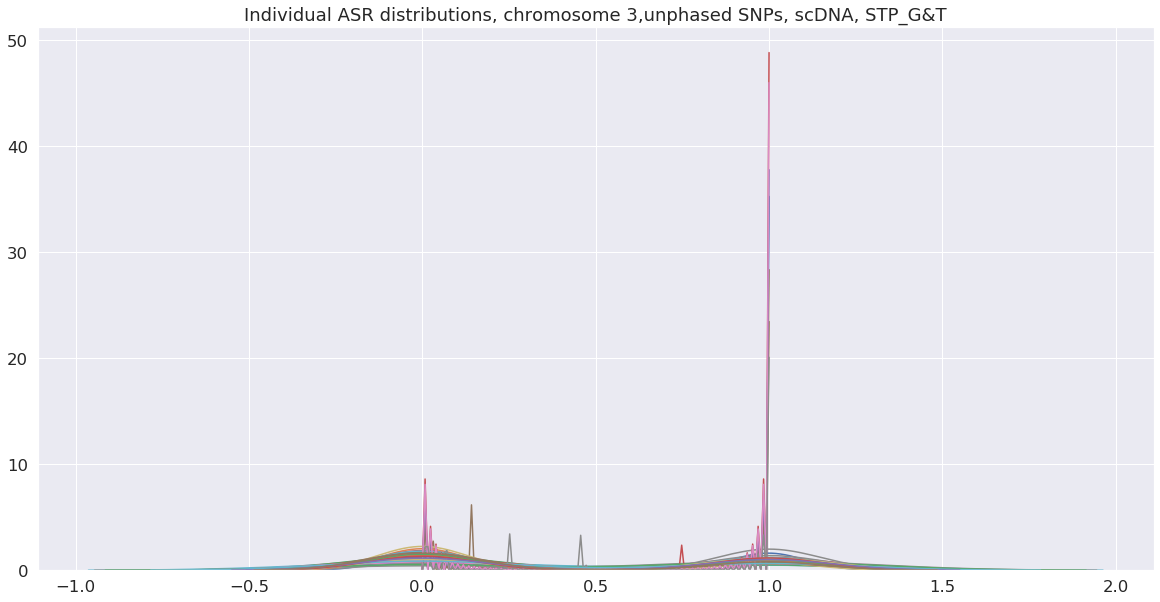

In [213]:
raw_snps_df = util.pickle_load(workspace.data["raw_snp_counts"])
plot_asr_distributions(
    raw_snps_df,
    mask=raw_snps_df["CHROM"].to_dense() == 3,
    title="Individual ASR distributions, chromosome 3,"\
            f"unphased SNPs, {modality_tag}, {sample_tag}"
)

/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


CPU times: user 1.46 s, sys: 795 ms, total: 2.25 s
Wall time: 2.23 s


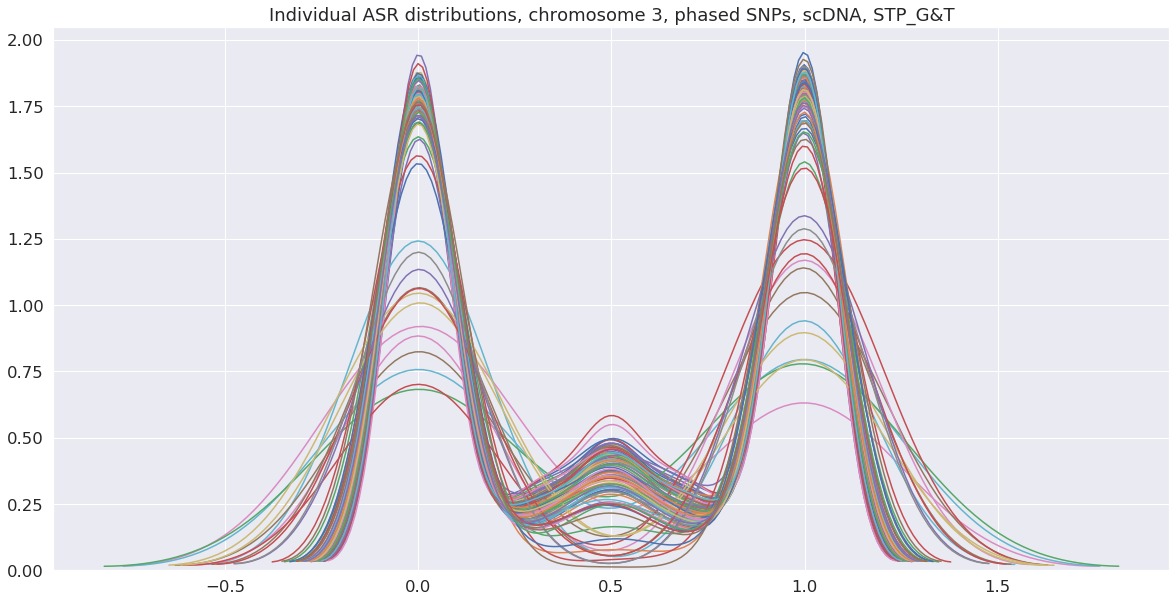

In [220]:
%%time
phased_snps_df = util.pickle_load(workspace.data["snp_counts"])
plot_asr_distributions(
    phased_snps_df,
    mask=phased_snps_df["CHROM"].to_dense() == 3,
    title="Individual ASR distributions, chromosome 3, "\
            f"phased SNPs, {modality_tag}, {sample_tag}"
)

In [221]:
block_counts_df = util.pickle_load(workspace.data["block_counts"])
block_counts_df.columns

Index(['BLOCK_ID', '0_ad', '0_dp', '1_ad', '1_dp', '10_ad', '10_dp', '11_ad',
       '11_dp', '12_ad',
       ...
       '91_ad', '91_dp', '92_ad', '92_dp', '93_ad', '93_dp', '94_ad', '94_dp',
       '95_ad', '95_dp'],
      dtype='object', length=193)

/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  
/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


CPU times: user 819 ms, sys: 102 ms, total: 922 ms
Wall time: 908 ms


(0, 1)

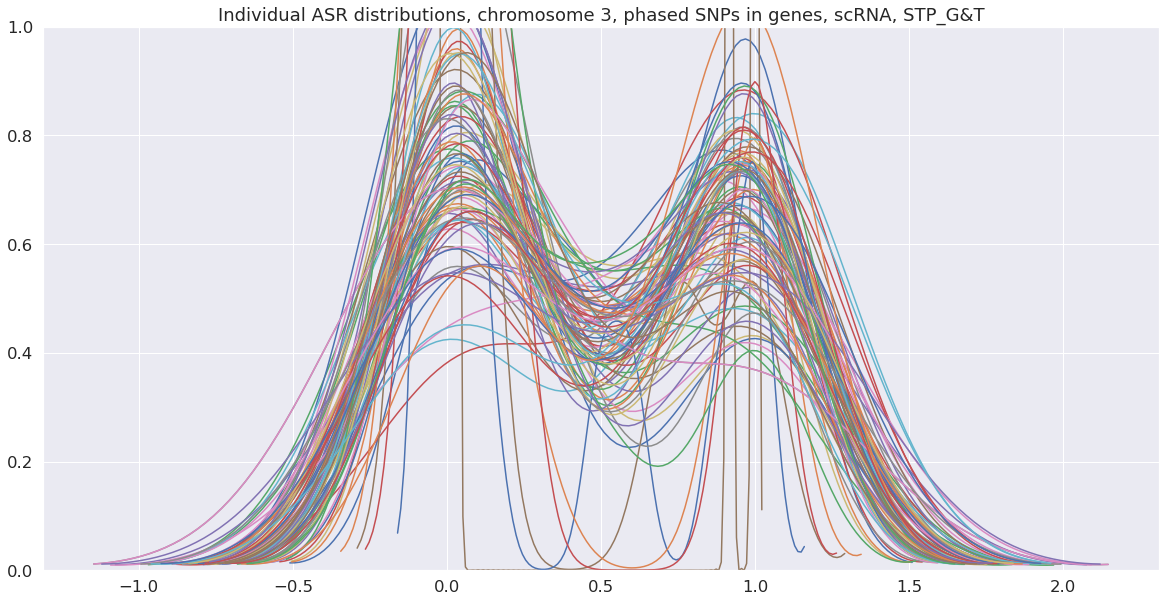

In [234]:
%%time
# block_df = util.pickle_load(workspace.data["blocks"])
block_counts_df = util.pickle_load(workspace.data["block_counts"])
plot_asr_distributions(
    block_counts_df,
    mask=((block_counts_df["CHROM"] == 3) 
          & (block_counts_df["START"] <= 72615150)),
    title="Individual ASR distributions, chromosome 3, "\
            f"phased SNPs in genes, {modality_tag}, {sample_tag}"
)
plt.ylim(0,1)

In [82]:
import matplotlib
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = matplotlib.cm.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], 
                        colors_rgba[i-1,ki], 
                        colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version


/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in greater_equal



CPU times: user 1.52 s, sys: 409 ms, total: 1.93 s
Wall time: 1.72 s


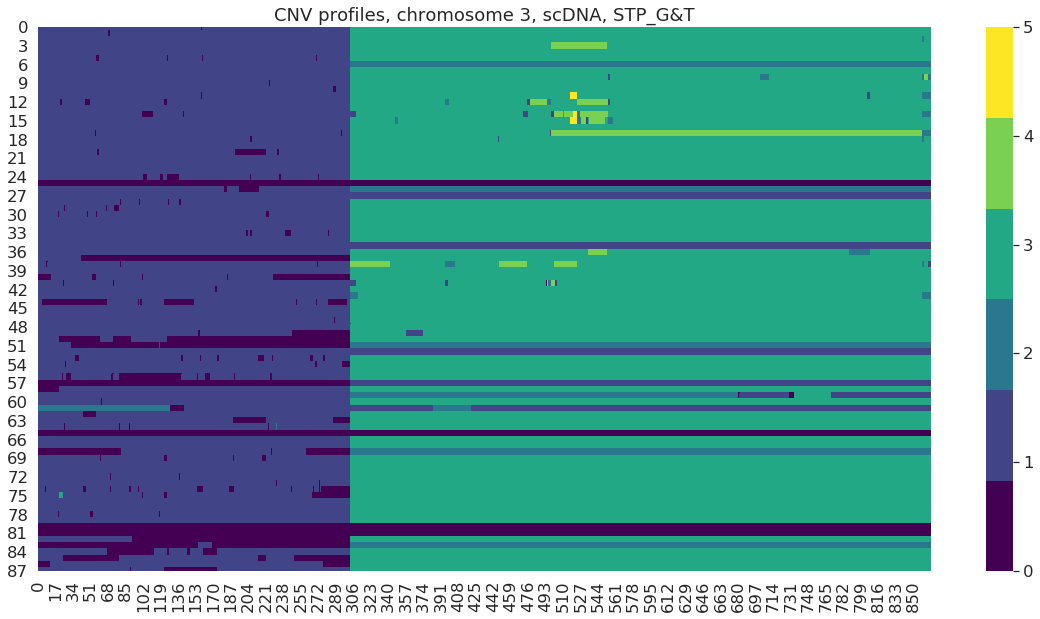

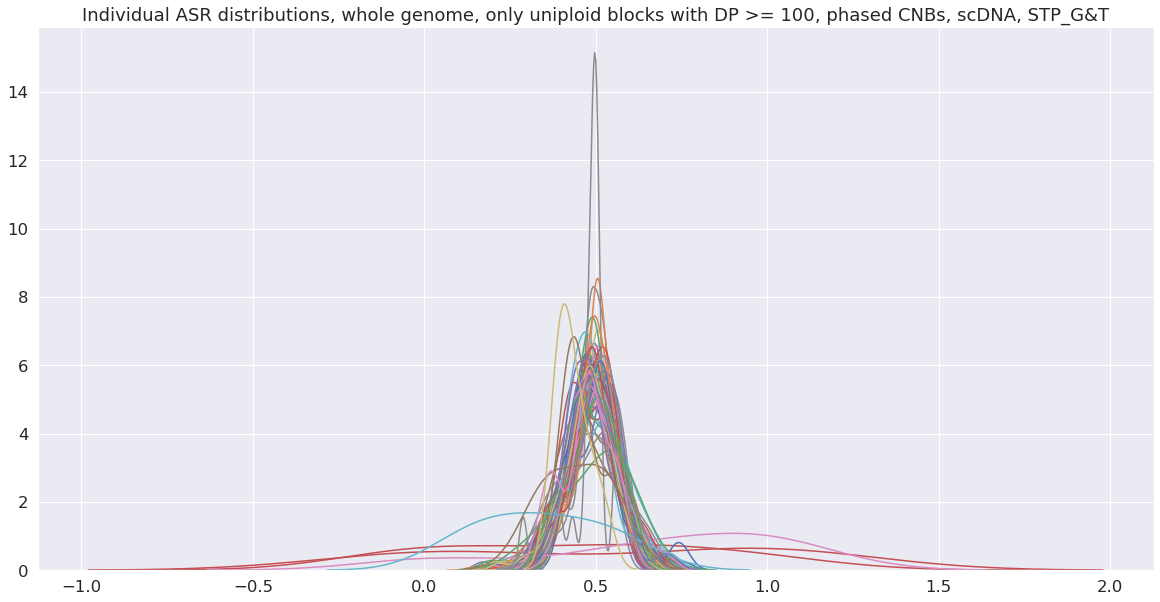

In [66]:
%%time
scDNA_clustering = util.pickle_load(
    "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/"
    "data/processed/STP_G&T/scDNA/evo_dist_9_eb_clustering.pkl"
)
cnv_profiles_df = util.pickle_load(workspace.data["block_cnv_per_cell"])
cell_id_to_barcode = dict(scDNA_clustering[["CELL_ID", "BARCODE"]].values)
block_counts_df = toolkit.filter_barcodes(
    util.pickle_load(workspace.data["block_counts"]),
    scDNA_clustering.CELL_ID
)
cell_ids = toolkit.extract_barcodes(block_counts_df)
for count_type in ["ad", "dp"]:
    block_counts_df.rename(
        columns={
            f"{cell_id}_{count_type}" 
            : f"{cell_id_to_barcode[cell_id]}_{count_type}"
            for cell_id in cell_ids
        }, 
        inplace=True
    )
block_counts_df = block_counts_df[np.hstack((
    ["BLOCK_ID", "CHROM", "START", "END"],
    np.ravel(
        [[f"{barcode}_ad", f"{barcode}_dp"] 
         for barcode  in cnv_profiles_df.drop(
             columns=["CHROM", "START", "END"]
        ).columns]
    )
))]
cnv_profiles_df = pd.merge(
    cnv_profiles_df,
    block_counts_df[["CHROM", "START", "END"]],
    on=["CHROM", "START", "END"]
)
block_counts_df = pd.merge(
    block_counts_df,
    cnv_profiles_df[["CHROM", "START", "END"]],
    on=["CHROM", "START", "END"]
)

block_counts_df = block_counts_df.query("CHROM == 3")
cnv_profiles_df = cnv_profiles_df.query("CHROM == 3")

ad_df = toolkit.extract_counts(block_counts_df, "ad").to_dense()
dp_df = toolkit.extract_counts(block_counts_df, "dp").to_dense()
ase_mx = ad_df.values / dp_df.values

cnv_mx = cnv_profiles_df\
    .drop(columns=["CHROM", "START", "END"])\
    .values

N = cnv_mx.max().max() - cnv_mx.min().min() + 1
cmap = cmap_discretize("viridis", N)
plt.figure(figsize=(20,10))
plt.title(f"CNV profiles, chromosome 3, {modality_tag}, {sample_tag}")
plt.xlabel("block_id")
plt.ylabel("cell_id")
sns.heatmap(cnv_mx.T, cmap=cmap)

sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
plt.title("Individual ASR distributions, whole genome, only uniploid blocks "\
            f"with DP >= 100, phased CNBs, {modality_tag}, {sample_tag}")
# plt.xlim((0, 1))
for cell_id in tqdm_notebook(range(ase_mx.shape[1])):
    dp_in_cell = dp_df.iloc[:, cell_id].values
    ase_in_cell = ase_mx[:, cell_id]
    cnv_profile_of_cell = cnv_mx[:, cell_id]
    sns.distplot(
        ase_in_cell[
            ~np.isnan(ase_in_cell)
            & (dp_in_cell >= 100)
            & (cnv_profile_of_cell == 3)
        ],
        hist=False,
        bins=np.linspace(0, 1, 100),
        norm_hist=True
    )

In [186]:
pd.DataFrame(
    toolkit.extract_barcodes(
        util.pickle_load(workspace.data["block_counts"])
    ),  columns=["BARCODE"]
).to_csv(f"{workspace.dir}/barcodes_T2.csv")

In [ ]:
for sample in ["T1", "T2"]:
    sample_id = int(sample[1:])
    haploblocks_df = pd.read_csv(
        f"/icgc/dkfzlsdf/analysis/B260/users/n790i/hipo_K08K/step8_tumor{sample_id}_cn.bed", 
        sep='\t',
        usecols=["HB_CHROM", "HB_START", "HB_END", "COPY_NUMBER"]
    )\
    .drop_duplicates()\
    .reset_index(drop=True)\
    .rename(columns={
        "HB_CHROM" : "CHROM",
        "HB_START" : "START",
        "HB_END" : "END"
    })
    haploblocks_df["BLOCK_ID"] = np.arange(haploblocks_df.shape[0]).astype(str)
    haploblocks_df.to_csv(
        f"{workspace.dir}/haplotype_blocks_{sample}.csv", 
        index=False
    )
    util.pickle_dump(
        haploblocks_df, 
        f"{workspace.dir}/haplotype_blocks_{sample}.pkl"
    )

In [240]:
path_to_g_t_cnv = ("/icgc/dkfzlsdf/analysis/B260/projects/"
                   "chromothripsis_medulloblastoma/xclone_inputs/"
                   "GTseq/STP-PDX/mode_SP/unit_genes/")

In [242]:
prefix = "xci_lane1DNA"
suffix = "_sequence.cbs.nochr.bed"
cell_id_to_cnv = {}
for filepath in tqdm_notebook(os.listdir(path_to_g_t_cnv)):
    filename, file_extension = os.path.splitext(filepath)
    if file_extension != ".bed": 
        continue
    cell_id = filepath.replace(prefix, '').replace(suffix, '')
    cnv_df = pd.read_csv(os.path.join(path_to_g_t_cnv, filepath), sep='\t')
    cnv_df.to_csv(f"{project_config.RAW}/STP_G&T/scDNA/{cell_id}_gene_cnv_profile.csv", index=False)
    phasing_df = cnv_df[["SNP_CHROM", "SNP_POS", "SNP_PHASE_INFO"]]
    phasing_df.rename(columns={
        "SNP_CHROM" : "CHROM",
        "SNP_POS" : "POS",
        "SNP_PHASE_INFO" : "PHASE"
    }, inplace=True)
    phasing_df.PHASE = phasing_df.PHASE.apply(lambda s: int(s[0]))
    phasing_df.to_csv(f"{workspace.dir}/stat_phasing.csv", index=False)
    util.pickle_dump(phasing_df, f"{workspace.dir}/stat_phasing.pkl")
    haploblock_df = cnv_df[["GENE_CHROM", "GENE_START", "GENE_END", "COPY_NUMBER"]].drop_duplicates()
    cell_id_to_cnv[cell_id] = haploblock_df
    print(cell_id, cnv_df.shape, haploblock_df.shape)
    util.pickle_dump(haploblock_df, f"{workspace.dir}/{cell_id}_gene_cnv_profile.pkl")

D2 (576783, 11) (16356, 4)
G7 (576783, 11) (16356, 4)
G4 (576783, 11) (16356, 4)
B10 (576783, 11) (16356, 4)
E12 (576783, 11) (16356, 4)
E7 (576783, 11) (16356, 4)
F12 (576783, 11) (16356, 4)
H4 (576783, 11) (16356, 4)
A5 (576783, 11) (16356, 4)
E3 (576783, 11) (16356, 4)
F7 (576783, 11) (16356, 4)
G5 (576783, 11) (16356, 4)
B2 (576783, 11) (16356, 4)
A11 (576783, 11) (16356, 4)
G11 (576783, 11) (16356, 4)
H1 (576783, 11) (16356, 4)
C6 (576783, 11) (16356, 4)
A2 (576783, 11) (16356, 4)
F10 (576783, 11) (16356, 4)
G6 (576783, 11) (16356, 4)
B5 (576783, 11) (16356, 4)
H3 (576783, 11) (16356, 4)
B11 (576783, 11) (16356, 4)
E5 (576783, 11) (16356, 4)
H5 (576783, 11) (16356, 4)
G3 (576783, 11) (16356, 4)
C8 (576783, 11) (16356, 4)
G9 (576783, 11) (16356, 4)
B7 (576783, 11) (16356, 4)
D8 (576783, 11) (16356, 4)
G1 (576783, 11) (16356, 4)
F2 (576783, 11) (16356, 4)
D4 (576783, 11) (16356, 4)
A6 (576783, 11) (16356, 4)
A3 (576783, 11) (16356, 4)
C3 (576783, 11) (16356, 4)
D7 (576783, 11) (1635

In [243]:
for cell_id in cell_id_to_cnv.keys():
    cell_id_to_cnv[cell_id].rename(
        columns={"COPY_NUMBER" : f"COPY_NUMBER_{cell_id}"}, 
        inplace=True
    )

In [244]:
%%time
from functools import reduce
cell_specific_cnv_df = reduce(
    lambda x, y: pd.merge(x, y, on=["GENE_CHROM", "GENE_START", "GENE_END"]), 
    tqdm_notebook([cell_id_to_cnv[key] 
                   for key in sorted(list(cell_id_to_cnv.keys()))])
)

CPU times: user 3.18 s, sys: 48.3 ms, total: 3.23 s
Wall time: 3.23 s


In [245]:
cell_specific_cnv_df = cell_specific_cnv_df.rename(
    columns={
        "GENE_CHROM" : "CHROM",
        "GENE_START" : "START",
        "GENE_END" : "END"
    }
).rename(
    columns={
        colname : colname.replace("COPY_NUMBER_", "") 
        for colname in cell_specific_cnv_df.columns
    }
)
# for colname in tqdm_notebook(cell_specific_cnv_df.columns):
#     if colname in ["CHROM", "START", "END"]:
#         continue
#     cell_specific_cnv_df[colname][
#         cell_specific_cnv_df[colname] > 5
#     ] = 5
util.pickle_dump(cell_specific_cnv_df, f"{workspace.dir}/gene_cnv_per_cell.pkl")
cell_specific_cnv_df.to_csv(f"{workspace.dir}/gene_cnv_per_cell.csv", index=False)

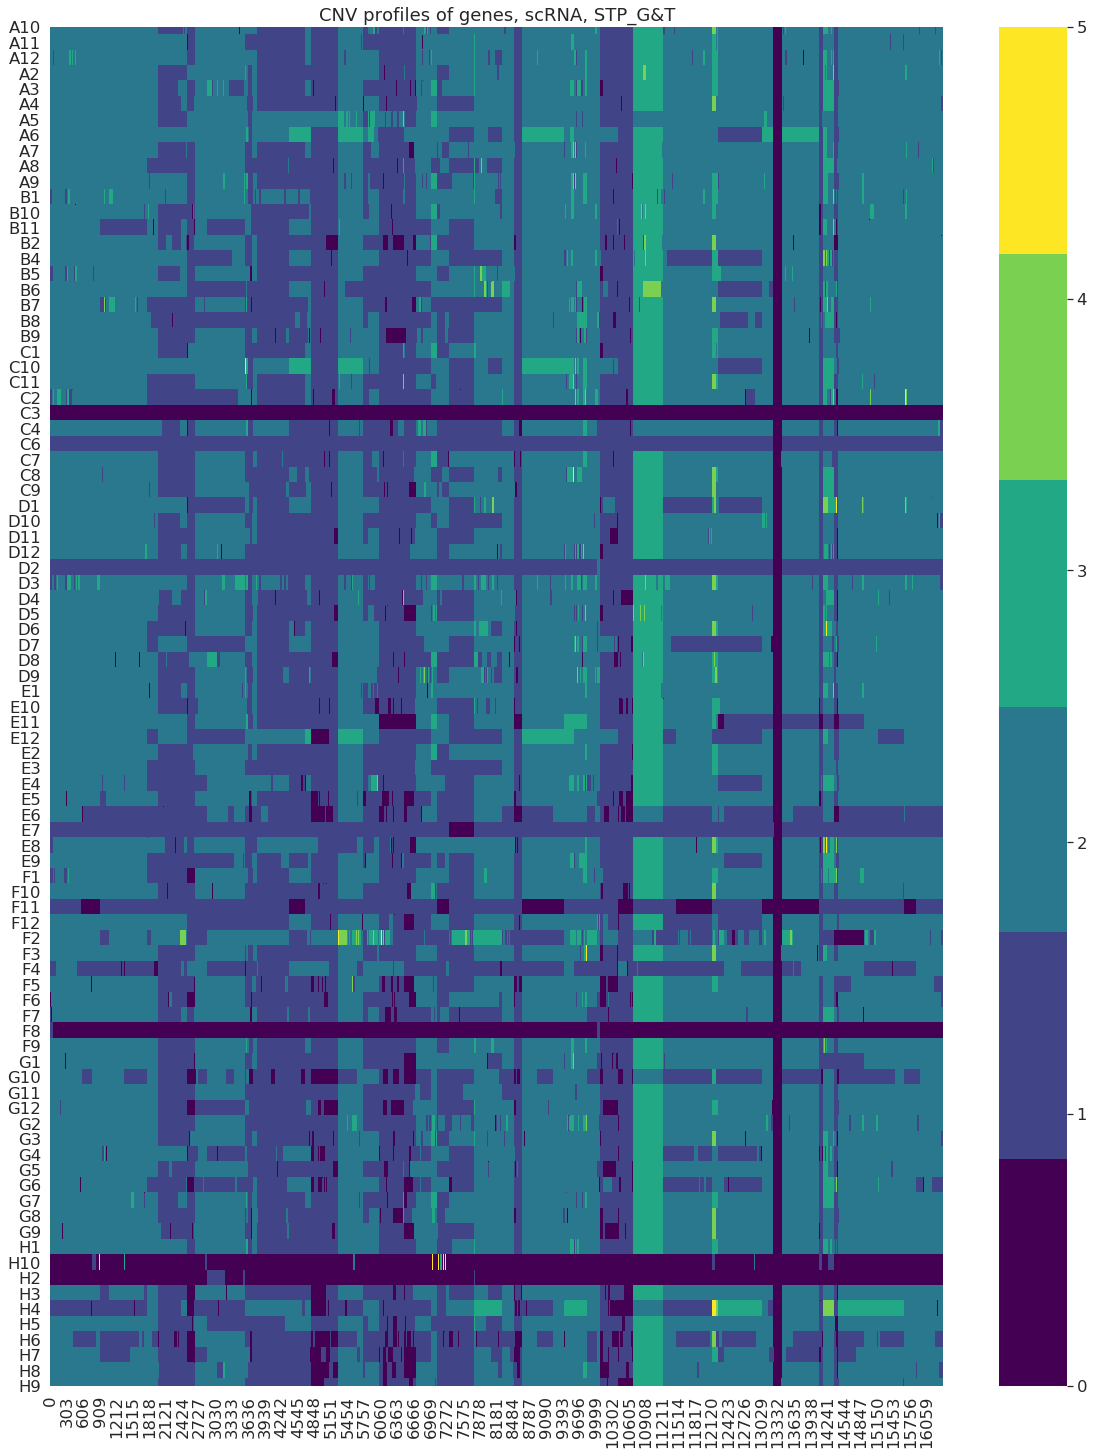

In [177]:
cnv_mx = cell_specific_cnv_df\
    .drop(columns=["CHROM", "START", "END"])\
    .values

N = cnv_mx.max().max() - cnv_mx.min().min() + 1
cmap = cmap_discretize("viridis", N)
plt.figure(figsize=(20,25))
plt.title(f"CNV profiles of genes, {modality_tag}, {sample_tag}")
plt.xlabel("gene_id")
plt.ylabel("cell_id")
sns.heatmap(
    cnv_mx.T, 
    cmap=cmap,
    yticklabels=cell_specific_cnv_df.drop(columns=["CHROM", "START", "END"]).columns
)

In [181]:
from scipy.special import softmax
dp_mx = toolkit.extract_counts(block_counts_df).to_dense().values

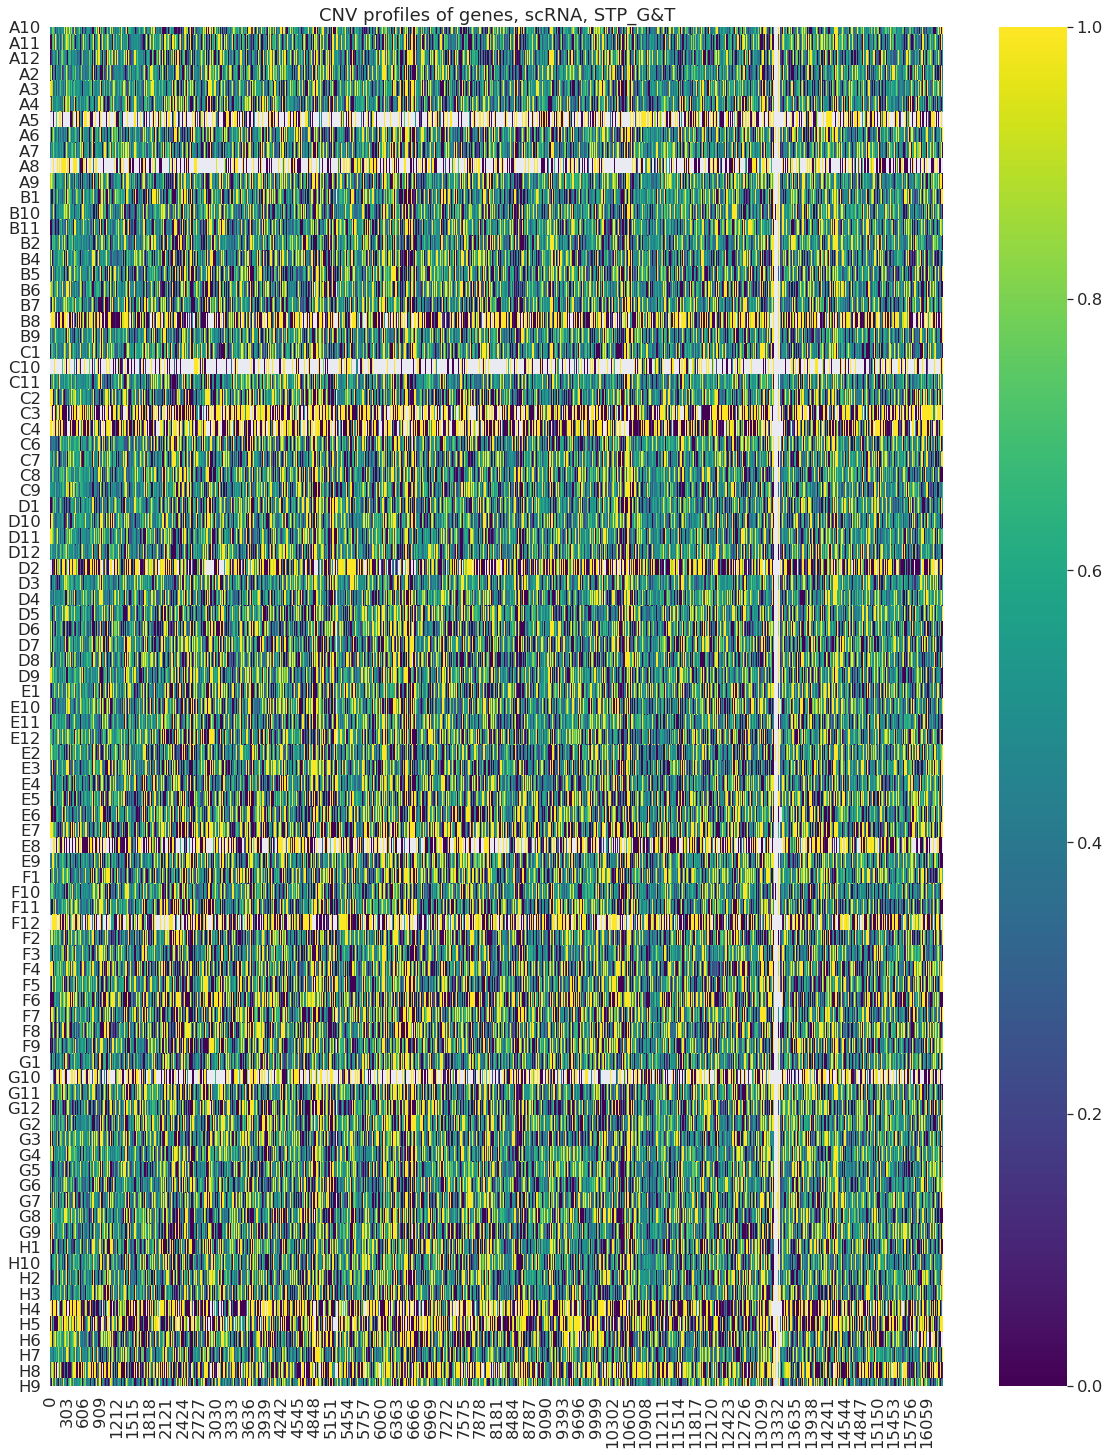

In [178]:
plt.figure(figsize=(20,25))
plt.title(f"CNV profiles of genes, {modality_tag}, {sample_tag}")
plt.xlabel("gene_id")
plt.ylabel("cell_id")
sns.heatmap(
    ase.to_dense().values.T, 
    cmap="viridis",
    yticklabels=cell_specific_cnv_df.drop(columns=["CHROM", "START", "END"]).columns
)

In [146]:
gene_df = cell_specific_cnv_df[["CHROM", "START", "END"]]
gene_df["BLOCK_ID"] = np.arange(gene_df.shape[0]).astype(str)
util.pickle_dump(
    gene_df,
    f"{workspace.dir}/genes.pkl"
)

/icgc/dkfzlsdf/analysis/B260/users/v390v/.conda/envs/xclone/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
block_counts = util.pickle_load(f"{workspace.data['block_counts']}")
toolkit.extract_barcodes(block_counts).shape
cell_id_to_barcode = dict(scDNA_clustering[["CELL_ID", "BARCODE"]].astype(str).values)
block_counts = pd.merge(
    block_counts, 
    cell_specific_cnv_df[["CHROM", "START", "END"]], 
    on=["CHROM", "START", "END"]
)
cell_specific_cnv_df = pd.merge(
    cell_specific_cnv_df, 
    block_counts[["CHROM", "START", "END"]], 
    on=["CHROM", "START", "END"]
)
assert block_counts.shape[0] == cell_specific_cnv_df.shape[0]
barcodes = toolkit.extract_barcodes(cell_specific_cnv_df)
block_counts = block_counts.rename(
    columns={
        f"{cell_id}_ad" : f"{cell_id_to_barcode[cell_id]}_ad"
        for cell_id in scDNA_clustering["CELL_ID"].astype(str)
    }
).rename(
   columns={
       f"{cell_id}_dp" : f"{cell_id_to_barcode[cell_id]}_dp"
       for cell_id in scDNA_clustering["CELL_ID"].astype(str)
       
   }
)
faulty_barcodes = np.setdiff1d(
    toolkit.extract_barcodes(block_counts),
    scDNA_clustering["BARCODE"]
)
block_counts.drop(
    columns=np.hstack([
        [f"{barcode}_ad", f"{barcode}_dp"]
        for barcode in faulty_barcodes
    ]), inplace=True
)
# faulty_barcodes
block_counts.head()
# scDNA_clustering.to_csv(f"{workspace.dir}/for_nicola/evo_dist_9_eb_clustering.csv")
cell_specific_cnv_df.to_csv(
    f"{workspace.dir}/for_nicola/block_cnv_per_cell.csv", 
    index=False
)
# for count_type in ["ad", "dp"]:
#     toolkit.extract_counts(
#         block_counts, 
#         suffix=count_type
#     ).to_csv(f"{workspace.dir}/for_nicola/{count_type}.csv", index=False)

In [138]:
np.intersect1d(cell_specific_cnv_df.columns[3:], scDNA_clustering["BARCODE"]).shape

(89,)

In [124]:
cell_id_to_barcode

{'CELL_ID': 0      1
 1      2
 2      3
 3      4
 4      5
       ..
 84    91
 85    92
 86    93
 87    94
 88    95
 Name: CELL_ID, Length: 89, dtype: object, 'BARCODE': 0     A10
 1     A11
 2     A12
 3      A2
 4      A3
      ... 
 84     H5
 85     H6
 86     H7
 87     H8
 88     H9
 Name: BARCODE, Length: 89, dtype: object}

In [121]:
scDNA_clustering

,BARCODE,LABEL,CELL_ID
0,A10,5,1
1,A11,1,2
2,A12,1,3
3,A2,2,4
4,A3,5,5
5,A4,3,6
6,A5,9,7
7,A6,1,8
8,A7,5,9
9,A8,8,10


In [6]:
raw_snp_counts = {
    modality : pd.read_csv(
        "/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/raw/STP_G&T/"
        f"{modality}/raw_snp_counts.csv"
    ) for modality in ["scDNA", "scRNA"]
}


In [7]:
raw_snp_counts["scDNA"].columns[2:]

Index(['lane1DNAA1_sequence.bam_ad', 'lane1DNAA1_sequence.bam_dp',
       'lane1DNAA10_sequence.bam_ad', 'lane1DNAA10_sequence.bam_dp',
       'lane1DNAA11_sequence.bam_ad', 'lane1DNAA11_sequence.bam_dp',
       'lane1DNAA12_sequence.bam_ad', 'lane1DNAA12_sequence.bam_dp',
       'lane1DNAA2_sequence.bam_ad', 'lane1DNAA2_sequence.bam_dp',
       ...
       'lane1DNAH5_sequence.bam_ad', 'lane1DNAH5_sequence.bam_dp',
       'lane1DNAH6_sequence.bam_ad', 'lane1DNAH6_sequence.bam_dp',
       'lane1DNAH7_sequence.bam_ad', 'lane1DNAH7_sequence.bam_dp',
       'lane1DNAH8_sequence.bam_ad', 'lane1DNAH8_sequence.bam_dp',
       'lane1DNAH9_sequence.bam_ad', 'lane1DNAH9_sequence.bam_dp'],
      dtype='object', length=192)

In [8]:
raw_snp_counts["scRNA"].columns[2:]

Index(['A1.Aligned.sortedByCoord.out.bam_ad',
       'A1.Aligned.sortedByCoord.out.bam_dp',
       'A10.Aligned.sortedByCoord.out.bam_ad',
       'A10.Aligned.sortedByCoord.out.bam_dp',
       'A11.Aligned.sortedByCoord.out.bam_ad',
       'A11.Aligned.sortedByCoord.out.bam_dp',
       'A12.Aligned.sortedByCoord.out.bam_ad',
       'A12.Aligned.sortedByCoord.out.bam_dp',
       'A2.Aligned.sortedByCoord.out.bam_ad',
       'A2.Aligned.sortedByCoord.out.bam_dp',
       ...
       'H5.Aligned.sortedByCoord.out.bam_ad',
       'H5.Aligned.sortedByCoord.out.bam_dp',
       'H6.Aligned.sortedByCoord.out.bam_ad',
       'H6.Aligned.sortedByCoord.out.bam_dp',
       'H7.Aligned.sortedByCoord.out.bam_ad',
       'H7.Aligned.sortedByCoord.out.bam_dp',
       'H8.Aligned.sortedByCoord.out.bam_ad',
       'H8.Aligned.sortedByCoord.out.bam_dp',
       'H9.Aligned.sortedByCoord.out.bam_ad',
       'H9.Aligned.sortedByCoord.out.bam_dp'],
      dtype='object', length=192)

In [16]:
assert raw_snp_counts["scDNA"].shape[1] ==  raw_snp_counts["scDNA"].shape[1]
n_cells = raw_snp_counts["scDNA"].shape[1] - 2
colname_to_id = {
    modality : OrderedDict([
        (barcode, str(i))
        for i, barcode in enumerate(
            toolkit.extract_barcodes(raw_snp_counts[modality])
        )
    ]) for modality in raw_snp_counts.keys()
}

In [26]:
for modality in ["scDNA", "scRNA"]:
    for suffix in ["ad", "dp"]:
        raw_snp_counts[modality].rename(
            columns={
                f"{colname}_{suffix}" :
                f"{cell_id}_{suffix}"
                for colname, cell_id in colname_to_id[modality].items() 
            }, inplace=True
        )
assert np.all(toolkit.extract_barcodes(raw_snp_counts["scDNA"]) \
    == toolkit.extract_barcodes(raw_snp_counts["scRNA"]))

In [27]:
raw_snp_counts["scDNA"]

,CHROM,POS,3_ad,3_dp,0_ad,0_dp,1_ad,1_dp,2_ad,2_dp,...,91_ad,91_dp,92_ad,92_dp,93_ad,93_dp,94_ad,94_dp,95_ad,95_dp
0,1,768253,NaN,NaN,3.0,4.0,NaN,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1,1,768448,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,769963,0.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,1,777232,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,789095,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,789099,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,789141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,791853,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
8,1,794332,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1,796511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


limit_output extension: Maximum message size of 10000 exceeded with 27746 characters

In [30]:
for modality in ["scDNA", "scRNA"]:
    util.pickle_dump(
        raw_snp_counts[modality],
        "/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/processed/"
        f"STP_G&T/{modality}/raw_snp_counts.pkl"
    )

In [32]:
# scDNA_clustering = pd.read_csv(
#     "/icgc/dkfzlsdf/analysis/B260/users/v390v/cnv_inference/data/raw/STP_G&T/"
#     "scDNA/evo_dist_9_eb.tsv",
#     sep='\t'
# ).rename(columns={"cell_id" : "BARCODE", "cluster" : "LABEL"})\
# .sort_values(by="CELL_ID")
# scDNA_clustering = util.pickle_load(f"{workspace.dir}/evo_dist_9_eb_clustering.pkl")
# scDNA_clustering.rename(
#     columns={"CELL_ID" : "BARCODE", "BARCODE" : "CELL_ID"}, 
#     inplace=True
# )
scDNA_clustering.head()

FileNotFoundError: [Errno 2] No such file or directory: '/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed/STP_G&T/scRNA/evo_dist_9_eb_clustering.pkl'

In [127]:
id_to_barcode = {}
letters = ["A", "B", "C", "D", "E", "F", "G", "H"] 
for colname, cell_id in colname_to_id["scRNA"].items():
    id_to_barcode[cell_id] = colname.split(".")[0]
barcode_to_id = {val : key for key, val in id_to_barcode.items()}
scDNA_clustering["BARCODE"] = scDNA_clustering["CELL_ID"].apply(barcode_to_id.get)
scDNA_clustering.head()

NameError: name 'colname_to_id' is not defined

In [117]:
util.pickle_dump(
    scDNA_clustering.astype(str),
    "/icgc/dkfzlsdf/analysis/B260/users/v390v/xclone/data/processed"
    "/STP_G&T/scDNA/evo_dist_9_eb_clustering.pkl",
)